## RCES 2018 Final Project
## A coral-based sea level curve for Barbados over MIS 5 
### Miranda Cashman

Using the Hibbert et al., 2016 coral database, I will create a few sea level curves for Barbados over MIS 5 (a through e), seeing how changing different parameters that go into sea level curve calculations change the final results.  

Data will be:
- filtered for Barbados only data
- screened to choose the most reliable data (some data is old or yield 'open system' ages, which are less reliable than 'closed system')
- location data is taken into account because of the differential uplift assumptions across the island
- I will calculate/use different uplift rates.  Uplift on Barbados is assumed to be constant through this period, but can we make that assumption?
- the eustatic sea level assumptions for MIS 5

Other things?
- GIA?
- Depth range?
- only using U/Th?  What about ESR?

Final product(s):
- 9 sea level curves with different parameters and assumptions (changing the screening of reliable ages, the uplift rate, the assumption of eustatic sea level, etc.)
- sea level curve comparison with published sea level curves for Barbados and eustatic SL curves


#### References
Hibbert et al., 2016

Thompson and Goldstein 2005

O'Leary et al., 2013

Cutler et al., 2003

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
#Hibbert et al., 2016 Coral database
hibbert_ds = pd.read_csv('Hibbert_Coral_database_2016.csv', na_values=['unknown', 'not reported', "can't calculate", "unknown (can't calculate)", np.nan])
hibbert_ds.head()

,ID,Source,Analysis ID,Location,Site,Additional Locality Info,Latitude,Longitude,decimal latitude,decimal longitude,...,Zcp uncert. (±2?),Zcp Comments,PRSL (m),+3?PRSL,-3?PRSL,+2?PRSL,-2?PRSL,+1?PRSL,-1?PRSL,PRSL Comments (in addition to Zcp comments)
0,1,1,33 (87GI-5),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.4,32.8,6.7,12.1,5.1,6.2,3.1,NaN
1,2,1,28 (87GI-4),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.4,13.7,2.4,8.0,1.7,1.8,1.0,NaN
2,3,1,35 (86GI-7),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,1.9,52.9,5.7,13.6,4.3,5.6,2.7,NaN
3,4,1,37 (87GI-7),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.9,63.5,10.4,21.1,8.4,6.1,5.9,NaN
4,5,1,31 (87GI-2),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.4,63.6,10.3,21.2,8.4,6.1,5.9,NaN


In [3]:
list(hibbert_ds)

['ID',
 'Source',
 'Analysis ID',
 'Location',
 'Site',
 'Additional Locality Info',
 'Latitude',
 'Longitude',
 'decimal latitude',
 'decimal longitude',
 'Lat/long estimated? Y/N',
 'Tectonic Category',
 'Uplift reported in original references',
 'Uplift error reported in original references',
 'Uplift rate Used        ',
 'Uplift rate Error used        ',
 'Comments (uplift)',
 'Original elevation datum used',
 'How elevation derived?',
 'Elevation reported in orignial reference',
 'Elevation uncertainty reported in original references',
 'Elevation obtained from other references',
 'Elevation uncertainty reported in other references',
 'Comments (elevation)',
 'Elevation Used (m)',
 'Elevation uncertainty used (m)',
 'Comments (elevation error)',
 'Explicitly state reef crest/top targeted in original sampling?',
 'Terrace Identification',
 'Facies',
 'additional sample information',
 'in growth position (Y/N)',
 'in situ',
 'Stratigraphic constraints available?',
 'Species',
 'Comm

In [4]:
#Clean Hibbert data

hibbert_ds = hibbert_ds.rename(index=str, columns={'Elevation Used (m)': 'elevation', 
                                              'Elevation uncertainty used (m)': 'ele_uncert',
                                              'Recalculated Conventional Age (ka)': 'age_ka', 
                                              'Recalcuated Conventional Age uncert. (+2?) includes decay cnst. uncert.': 'age_uncert_2sig',
                                                  'decimal latitude': 'dec_lat',
                                                  'decimal longitude': 'dec_lon', 
                                                  'Uplift rate Used        ': 'uplift'})
hibbert_ds.elevation.astype('float64')
hibbert_ds.age_ka.astype('float64')
hibbert_ds.dec_lat.astype('float64')
hibbert_ds.dec_lon.astype('float64')
hibbert_ds.uplift.astype('float64')
hibbert_ds.head()

,ID,Source,Analysis ID,Location,Site,Additional Locality Info,Latitude,Longitude,dec_lat,dec_lon,...,Zcp uncert. (±2?),Zcp Comments,PRSL (m),+3?PRSL,-3?PRSL,+2?PRSL,-2?PRSL,+1?PRSL,-1?PRSL,PRSL Comments (in addition to Zcp comments)
0,1,1,33 (87GI-5),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.4,32.8,6.7,12.1,5.1,6.2,3.1,NaN
1,2,1,28 (87GI-4),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.4,13.7,2.4,8.0,1.7,1.8,1.0,NaN
2,3,1,35 (86GI-7),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,1.9,52.9,5.7,13.6,4.3,5.6,2.7,NaN
3,4,1,37 (87GI-7),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.9,63.5,10.4,21.1,8.4,6.1,5.9,NaN
4,5,1,31 (87GI-2),Bahamas,Great Inagua Island,Devil's Point Reef,21°01'N,73°42'W,21.017,-73.7,...,1.0,NaN,0.4,63.6,10.3,21.2,8.4,6.1,5.9,NaN


Text(0,0.5,'Sample elevation')

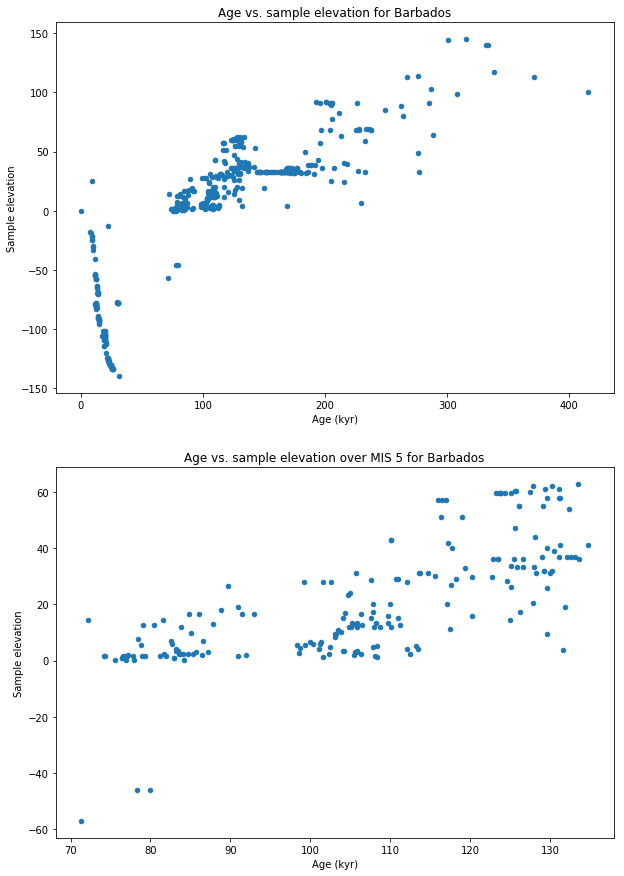

In [5]:
#BARBADOS plots
barbados = hibbert_ds[hibbert_ds.Location == 'Barbados']
barbados = barbados.sort_values('age_ka')

#Isolate MIS 5
barbados_mis5 = barbados[barbados.age_ka >= 70]
barbados_mis5 = barbados_mis5[barbados_mis5.age_ka <= 135]

fig, ax = plt.subplots(nrows=2, figsize=(10, 15))
ax1, ax2 = ax

barbados.plot.scatter(x='age_ka', y='elevation', marker='o', ax=ax1)
ax1.set_title('Age vs. sample elevation for Barbados')
ax1.set_xlabel('Age (kyr)')
ax1.set_ylabel('Sample elevation')

barbados_mis5.plot.scatter(x='age_ka', y='elevation', ax=ax2)
ax2.set_title('Age vs. sample elevation over MIS 5 for Barbados')
ax2.set_xlabel('Age (kyr)')
ax2.set_ylabel('Sample elevation')


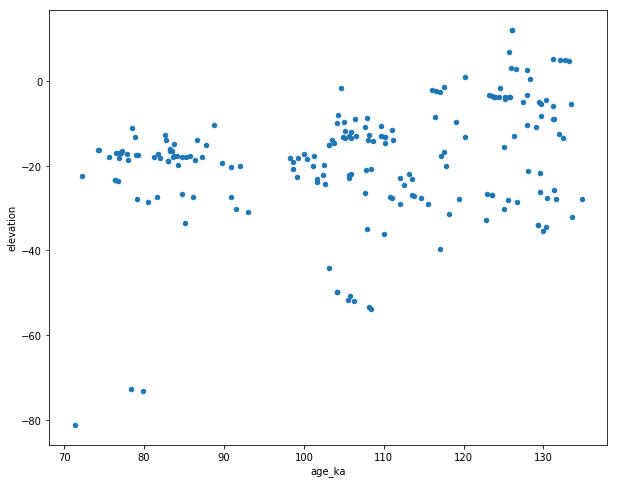

In [42]:
barbados_corr = barbados[barbados.age_ka >= 70]
barbados_corr = barbados_corr[barbados_corr.age_ka <= 135]
barbados_corr['elevation'] = barbados_corr['elevation'] - (barbados_corr['age_ka'] * barbados_corr['uplift'])

fig, ax = plt.subplots(figsize=(10, 8))

barbados_corr.plot.scatter(x='age_ka', y='elevation', ax=ax)

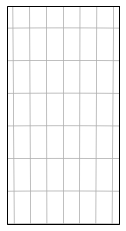

In [22]:
extent = [13, 14, -59, -60]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

proj = ccrs.Orthographic(central_lon, central_lat)

ax = plt.axes(projection=proj)
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')